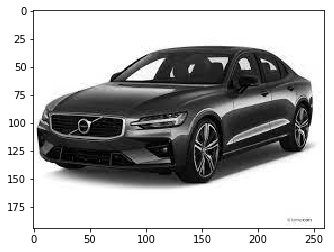

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

DATADIR = r"C:\Users\canan\Documents\car_human_dataset"
CATEGORIES = ["car_data","human_data"]
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

                            

In [14]:
print(img_array.shape)

(194, 259)


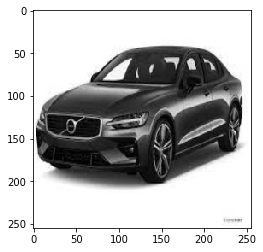

In [15]:
IMG_SIZE = 255

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show() 

In [16]:
#NAME = "Car-vs-Human-CNN"

In [17]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to cars and human
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=car, 1=human

        for img in tqdm(os.listdir(path)):  # iterate over each image per cars and humans
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  
                pass
            
create_training_data()

print(len(training_data))


100%|███████████████████████████████████████████████████████████████████████████████| 204/204 [00:01<00:00, 184.65it/s]

408


In [18]:
print(len(training_data))

408


In [19]:
import random

random.shuffle(training_data)

In [20]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
0
1
0
1


In [21]:
X = []
y = []
X = np.array(X)
y = np.array(y)

for features,label in training_data:
    X = np.append(X,features)
    y = np.append(y,label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

In [22]:
import pickle

pickle_out = open("X.pickle","wb") #wb : It means: open for writing and open in binary mode.
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [24]:

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
#callbacks=[tensorboard]

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          )

Epoch 1/3
9/9 [==============================] - 206s 23s/step - loss: 17.9527 - accuracy: 0.4877 - val_accuracy: 0.8618 - val_loss: 0.6409
Epoch 2/3
9/9 [==============================] - 166s 18s/step - loss: 0.4958 - accuracy: 0.8596 - val_accuracy: 0.9593 - val_loss: 0.1588
Epoch 3/3
9/9 [==============================] - 189s 21s/step - loss: 0.2045 - accuracy: 0.9439 - val_accuracy: 0.9756 - val_loss: 0.1155
